In [1]:
from google.colab import files
uploaded=files.upload()

Saving T1.csv to T1.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import os

In [3]:
df = pd.read_csv('T1.csv', delimiter=',')

In [4]:
dataset = df[['Date/Time','Wind Speed (m/s)']]
dataset = dataset.rename(columns = {"Date/Time" :"timeStamp","Wind Speed (m/s)":"windSpeed"})
dataset = dataset[0:5000]

In [5]:
dataset.index = pd.to_datetime(dataset.timeStamp)
dataset = dataset.drop('timeStamp', axis=1)

dataset = dataset.sort_index()
dataset.fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


,windSpeed
timeStamp,
2018-01-01 00:00:00,5.311336
2018-01-01 00:10:00,5.672167
2018-01-01 00:20:00,5.216037
2018-01-01 00:30:00,5.659674
2018-01-01 00:40:00,5.577941
...,...
2018-12-01 23:10:00,5.901831
2018-12-01 23:20:00,6.314789
2018-12-01 23:30:00,6.212303


In [6]:
# Testing whether there are null values
dataset[dataset.isnull()]
len(dataset[dataset.isnull()])
dataset = dataset.sort_index()
dataset.index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:10:00',
               '2018-01-01 00:20:00', '2018-01-01 00:30:00',
               '2018-01-01 00:40:00', '2018-01-01 00:50:00',
               '2018-01-01 01:00:00', '2018-01-01 01:10:00',
               '2018-01-01 01:20:00', '2018-01-01 01:30:00',
               ...
               '2018-12-01 22:20:00', '2018-12-01 22:30:00',
               '2018-12-01 22:40:00', '2018-12-01 22:50:00',
               '2018-12-01 23:00:00', '2018-12-01 23:10:00',
               '2018-12-01 23:20:00', '2018-12-01 23:30:00',
               '2018-12-01 23:40:00', '2018-12-01 23:50:00'],
              dtype='datetime64[ns]', name='timeStamp', length=5000, freq=None)

In [7]:
# Replacing NaN values with the previous effective data
dataset.windSpeed.fillna(method='pad', inplace=True)
dataset[dataset.windSpeed.isnull()]

dataset.describe()

,windSpeed
count,5000.000000
mean,9.476864
std,5.038876
min,0.000000
25%,5.767437
50%,8.977808
75%,12.692423
max,25.206011


In [9]:
dataset

,windSpeed
timeStamp,
2018-01-01 00:00:00,5.311336
2018-01-01 00:10:00,5.672167
2018-01-01 00:20:00,5.216037
2018-01-01 00:30:00,5.659674
2018-01-01 00:40:00,5.577941
...,...
2018-12-01 23:10:00,5.901831
2018-12-01 23:20:00,6.314789
2018-12-01 23:30:00,6.212303


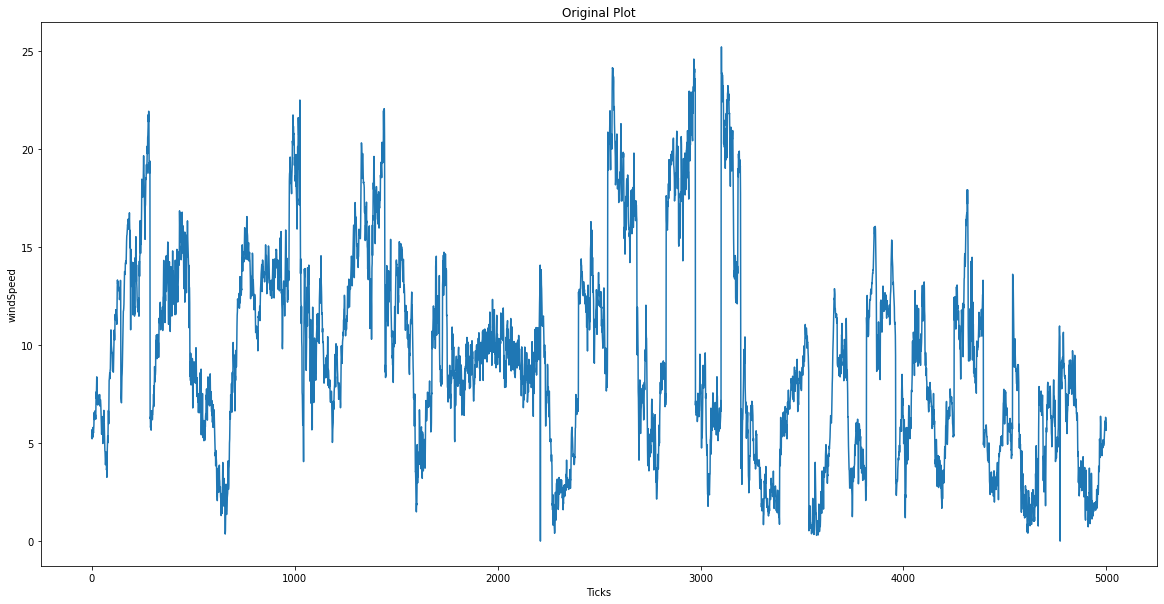

In [10]:
dataset['Ticks'] = range(0,len(dataset.index.values))

#very simple plotting
fig = plt.figure(1,figsize=(20,10))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('windSpeed')
ax1.set_title('Original Plot')
ax1.plot('Ticks', 'windSpeed', data = dataset);

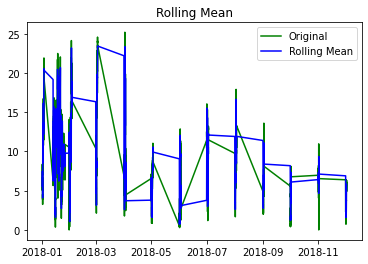

Augmented Dickey-Fuller test:
type of df_test:  <class 'tuple'>
df_test:  (-6.144307250627126, 7.834283924037626e-08, 4, 4995, {'1%': -3.43165984259144, '5%': -2.8621188086591505, '10%': -2.5670781005730454}, 14219.983885584175)
df_output: 
 Test Statistic                -6.144307e+00
p-value                        7.834284e-08
#Lags Used                     4.000000e+00
Number of Observations Used    4.995000e+03
dtype: float64
Test Statistic                -6.144307e+00
p-value                        7.834284e-08
#Lags Used                     4.000000e+00
Number of Observations Used    4.995000e+03
Critical Value (1%)           -3.431660e+00
Critical Value (5%)           -2.862119e+00
Critical Value (10%)          -2.567078e+00
dtype: float64


In [11]:
from statsmodels.tsa.stattools import adfuller
def stationarity_check(ts):    
    # Determing rolling statistics
    #roll_mean = pd.rolling_mean(ts, window=12)
    roll_mean = ts.rolling(12).mean()
    
    # Plot rolling statistics:
    plt.plot(ts, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
    print("type of df_test: ",type(df_test))
    print("df_test: ",df_test)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)
    
stationarity_check(dataset.windSpeed)

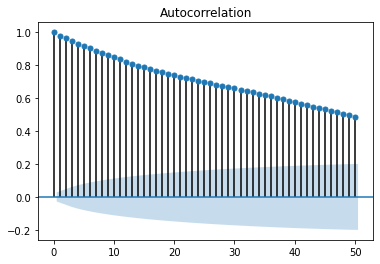

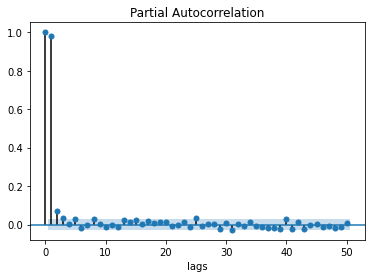

In [12]:
#dfIndia['Roll_Mean'] = pd.rolling_mean(dfIndia.AverageTemperature, window=12)
dataset['Roll_Mean'] = dataset.windSpeed.rolling(12).mean()
dataset.windSpeed.rolling(12)

from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
plot_acf(dataset.windSpeed, lags=50)
plot_pacf(dataset.windSpeed, lags=50)
plt.xlabel('lags')
plt.show()

In [13]:
from statsmodels.tsa.arima_model import ARMA

import itertools
p = q = range(0, 4)
pq = itertools.product(p, q)
for param in pq:
    try:
        mod = ARMA(dataset.windSpeed,order=param)
        results = mod.fit()
        print('ARMA{} - AIC:{}'.format(param, results.aic))
    except:
        continue
    
model = ARMA(dataset.windSpeed, order=(1,2))  
results_MA = model.fit()  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

ARMA(0, 0) - AIC:30364.214754066536
ARMA(0, 1) - AIC:24801.856104221864
ARMA(0, 2) - AIC:21549.842835420997


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARMA(0, 3) - AIC:19423.919558228023
ARMA(1, 0) - AIC:14317.324221839885


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARMA(1, 1) - AIC:14294.566836956228


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARMA(1, 2) - AIC:14291.390246670799


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARMA(1, 3) - AIC:14293.385547158914
ARMA(2, 0) - AIC:14296.264728506147


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARMA(2, 1) - AIC:14291.089556512408


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARMA(2, 2) - AIC:14292.461574410294


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARMA(3, 0) - AIC:14291.83897833489


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARMA(3, 1) - AIC:14293.214932053577


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARMA(3, 2) - AIC:14292.40101586593


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


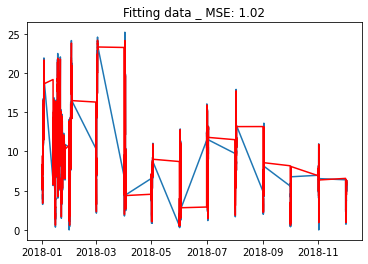

In [14]:
plt.plot(dataset.windSpeed)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('Fitting data _ MSE: %.2f'% (((results_MA.fittedvalues-dataset.windSpeed)**2).mean()))
plt.show()

In [15]:
predictions = results_MA.predict('2018-12-01 18:50:00')
predictions

timeStamp
2018-12-01 18:50:00    4.460889
2018-12-01 19:00:00    4.389969
2018-12-01 19:10:00    5.277698
2018-12-01 19:20:00    6.305601
2018-12-01 19:30:00    6.055594
2018-12-01 19:40:00    5.467116
2018-12-01 19:50:00    4.672773
2018-12-01 20:00:00    4.762773
2018-12-01 20:10:00    4.660974
2018-12-01 20:20:00    4.604682
2018-12-01 20:30:00    4.463259
2018-12-01 20:40:00    4.824619
2018-12-01 20:50:00    5.023217
2018-12-01 21:00:00    4.946498
2018-12-01 21:10:00    4.849481
2018-12-01 21:20:00    4.988229
2018-12-01 21:30:00    5.224989
2018-12-01 21:40:00    5.147784
2018-12-01 21:50:00    4.963386
2018-12-01 22:00:00    5.015975
2018-12-01 22:10:00    5.063678
2018-12-01 22:20:00    5.223740
2018-12-01 22:30:00    5.483824
2018-12-01 22:40:00    5.769377
2018-12-01 22:50:00    6.126335
2018-12-01 23:00:00    6.164913
2018-12-01 23:10:00    6.040558
2018-12-01 23:20:00    5.975328
2018-12-01 23:30:00    6.344626
2018-12-01 23:40:00    6.262318
2018-12-01 23:50:00    5.75692

In [17]:

joblib.dump(results_MA, 'humidityModel.pkl') 

NameError: ignored